In [7]:
%pylab inline
import pandas as pd
import calendar

Populating the interactive namespace from numpy and matplotlib


### TEST 1

In [10]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [11]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


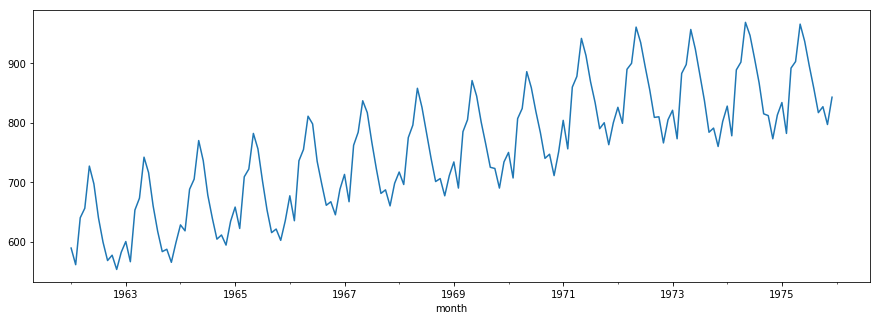

In [25]:
plt.figure(figsize(15,5))
milk['milk'].plot()

Примените к ряду из предыдущего вопроса критерий Дики-Фуллера

statsmodels.tsa.stattools.adfuller

Returns:

adf : float
Test statistic

pvalue : float
MacKinnon’s approximate p-value based on MacKinnon (1994, 2010)

usedlag : int
Number of lags used

nobs : int
Number of observations used for the ADF regression and calculation of the critical values

critical values : dict
Critical values for the test statistic at the 1 %, 5 %, and 10 % levels. Based on MacKinnon (2010)

icbest : float
The maximized information criterion if autolag is not None.

resstore : ResultStore, optional
A dummy class with results attached as attributes

In [8]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(milk.milk)

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(-1.3038115874221297,
 0.6274267086030316,
 13,
 154,
 {'1%': -3.473542528196209,
  '10%': -2.576878053634677,
  '5%': -2.880497674144038},
 1115.1730447395112)

Часто, когда вы имеете дело с величинами, представляющими собой сумму значений показателя за каждый день или за каждый рабочий день, имеет смысл перед началом прогнозирования поделить весь ряд на число дней в периоде. Например, если поделить ряд с объёмом производства молока на одну корову на число дней в месяце, полученная величина будет меняться более плавно, и для неё легче будет построить прогнозирующую модель.

Корректно определить число дней в месяце можно с помощью свойства days_in_month у индекса ряда или функции monthrange из пакета calendar. Используйте число дней в месяце для того, чтобы вычислить новый показатель — среднее дневное число полученного молока на одну корову. Постройте график этого ряда и убедитесь, что он стал более гладким. В качестве ответа введите сумму значений полученного показателя за весь период; округлите до двух знаков после десятичной точки. 

In [12]:
m_days = [calendar.monthrange(i.year, i.month)[1] for i in milk.index]
m_days

[31,
 28,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 28,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 29,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 28,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 28,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 28,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 29,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 28,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 28,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 28,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 29,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 28,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 28,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 28,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31]

In [13]:
milk['daily']=milk.milk*1.0/m_days

In [14]:
milk.head()

,milk,daily
month,,
1962-01-01,589,19.000000
1962-02-01,561,20.035714
1962-03-01,640,20.645161
1962-04-01,656,21.866667
1962-05-01,727,23.451613


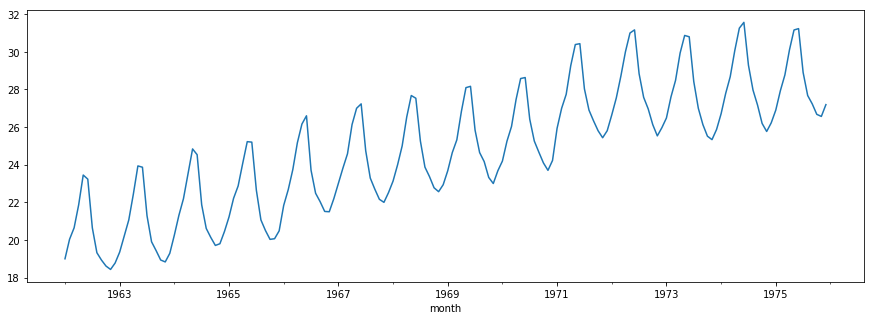

In [24]:
plt.figure(figsize(15,5))
milk['daily'].plot()

In [28]:
sum(milk.daily)

4166.326661899466

### TEST 2

Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерий Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

In [15]:
sm.tsa.stattools.adfuller(milk.daily)

(-1.1798216373266066,
 0.6822151513081428,
 12,
 155,
 {'1%': -3.4732590518613002,
  '10%': -2.5768120811654525,
  '5%': -2.880374082105334},
 -1.5708067458066353)

Чтобы сделать сезонное дифференцирование, нужно изменить значение параметра у функции shift

При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (NaN). 

In [40]:
milk['daily_diff1'] = milk.daily - milk.daily.shift(1) #обычное дифференциорование
milk['daily_diff12'] = milk.daily - milk.daily.shift(12) #сезонное дифференцирование
milk['daily_diff121'] = milk.daily_diff12 - milk.daily_diff12.shift(1) # два послед-ных дифференцирования-сезонное и обычное

In [48]:
milk.head()

,milk,daily,daily_diff1,daily_diff12,daily_diff121
month,,,,,
1962-01-01,589,19.000000,NaN,NaN,NaN
1962-02-01,561,20.035714,1.035714,NaN,NaN
1962-03-01,640,20.645161,0.609447,NaN,NaN
1962-04-01,656,21.866667,1.221505,NaN,NaN
1962-05-01,727,23.451613,1.584946,NaN,NaN


In [45]:
milk[12:]

,milk,daily,daily_diff1,daily_diff12,daily_diff121
month,,,,,
1963-01-01,600,19.354839,0.580645,0.354839,NaN
1963-02-01,566,20.214286,0.859447,0.178571,-0.176267
1963-03-01,653,21.064516,0.850230,0.419355,0.240783
1963-04-01,673,22.433333,1.368817,0.566667,0.147312
1963-05-01,742,23.935484,1.502151,0.483871,-0.082796
1963-06-01,716,23.866667,-0.068817,0.633333,0.149462
1963-07-01,660,21.290323,-2.576344,0.645161,0.011828
1963-08-01,617,19.903226,-1.387097,0.580645,-0.064516
1963-09-01,583,19.433333,-0.469892,0.500000,-0.080645


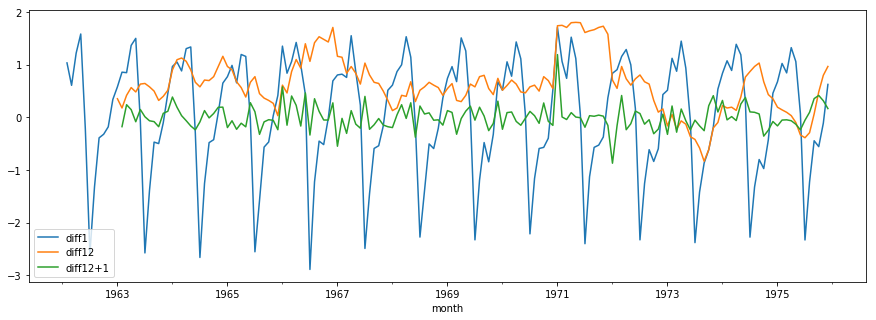

In [57]:
plt.figure(figsize(15,5))
milk.daily_diff1.plot(label='diff1') # обычное дифференциорование - сдвиг на 1 
milk.daily_diff12.plot(label='diff12') # сезонное дифференцирование - сдвиг на 12
milk.daily_diff121.plot(label='diff12+1') # двойное последовательное дифф-е: сезонное, потом обычное - сдвиг на 12, потом на 1
plt.legend()

Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите неопределённый достигаемый уровень значимости.

Итак, какое дифференцирование делает ряд стационарным?

In [47]:
# milk.daily_diff1.dropna(inplace=True)
sm.tsa.stattools.adfuller(milk.daily_diff1)

(-2.606630731045341,
 0.09163455965790823,
 11,
 144,
 {'1%': -3.476597917537401,
  '10%': -2.5775887982253085,
  '5%': -2.8818291230495543},
 6.524108890266348)

In [49]:
# milk.daily_diff12.dropna(inplace=True)
sm.tsa.stattools.adfuller(milk.daily_diff12[12:])

(-2.159486093288809,
 0.22127672658830333,
 12,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.577665408088415,
  '5%': -2.8819726324025625},
 -25.225679141303317)

In [58]:
# milk.daily_diff121.dropna(inplace=True)
sm.tsa.stattools.adfuller(milk.daily_diff121[13:]) # за счет двойного дифференцирования ряда по критерию Дики-Фуллера
# мы получили стациоанрный ряд:  p = 2.2808455518036924e-06 < 0.05

(-5.48132633479693,
 2.2808455518036924e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.577665408088415,
  '5%': -2.8819726324025625},
 -20.90513750989237)

Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции. Исходя из этого графика, какое начальное приближение вы предложили бы для параметра Q в модели SARIMA? Q=1 - cезонный период равен 12, а максимальный значимый лаг, кратный 12 это 12 =12∗1.

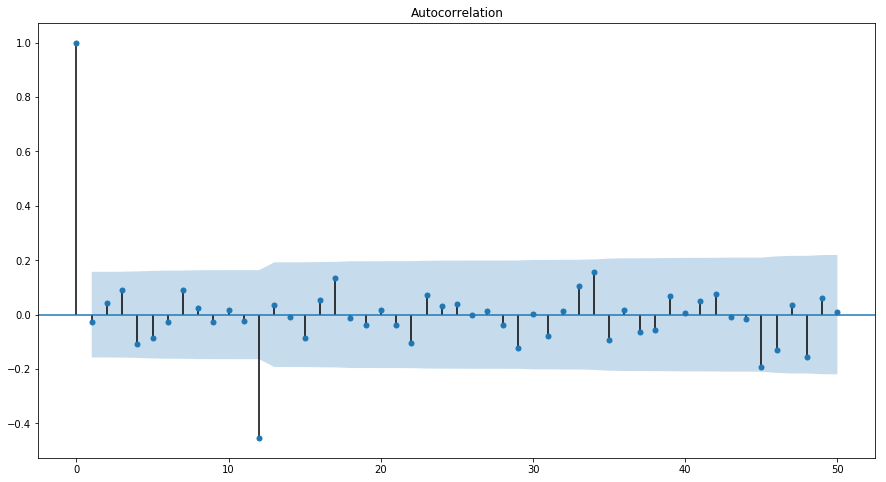

In [53]:
import statsmodels.api as sm

plt.figure(figsize(15,8))
sm.graphics.tsa.plot_acf(milk.daily_diff121[13:].values.squeeze(), lags=50)
pylab.show()

Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции. Исходя из этого графика, какое начальное приближение вы предложили бы для параметра p в модели SARIMA? p=3 - значимо отличающиеся от нуля лаги

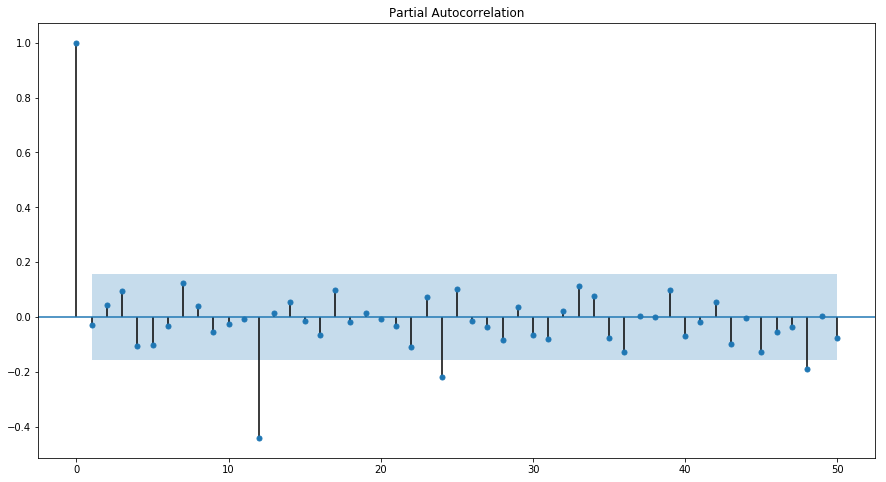

In [55]:
sm.graphics.tsa.plot_pacf(milk.daily_diff121[13:].values.squeeze(), lags=50)
pylab.show()